In [1]:
import matplotlib.pyplot as plt
import numpy as np

from oscar import OSCAR

%matplotlib inline

<div class="alert alert-info"><h1>Exercise 1: Ocean and land carbon sinks</h1></div>
1. Run a simulation using the RCP8.5 scenario for all emissions.

In [2]:
r8 = OSCAR(scen_ALL='RCP8.5').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="2">
<li>Plot the evolution of the land (LSNK) and ocean sink (OSNK). Why do you think the land sink is more sensitive to natural variability?</li>
<ol>

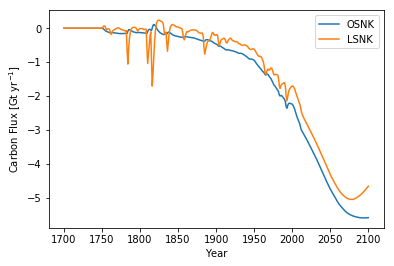

In [4]:
year = np.arange(len(r8['D_gst'])) + 1700

fig, ax = plt.subplots(1, 1)

ax.plot(year, r8['OSNK'], label='OSNK')
ax.plot(year, r8['LSNK'], label='LSNK')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Carbon Flux [Gt yr$^{-1}$]')

<ol start="3">
<li>Are there emissions of CO2 other than fossil fuel emissions? If yes, plot their evolution with time.  Hint: look at Equation 33 of [Gasser et al. (2017)](https://www.geosci-model-dev.net/10/271/2017/), which shows the sources and sinks of atmospheric CO2 on the right hand side, and the available [output variables](http://www.princeton.edu/~skclark/oscar/outputs.html) in the online documentation of `OSCAR`.</li>
</ol>

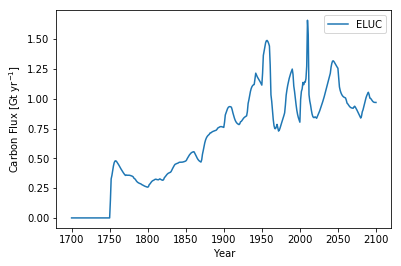

In [5]:
fig, ax = plt.subplots(1, 1)

ax.plot(year, r8['ELUC']['Total'], label='ELUC')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Carbon Flux [Gt yr$^{-1}$]')

<ol start="4">
<li>Deduce the atmospheric growth rate of CO2, i.e. the annual increase in atmopsheric CO2 in Gt per year. Consider the CO2 budget in the atmopshere [Equation 33 of Gasser et al. (2017)]. What are the sources, what are the sinks? Deduce the atmospheric growth rate from this budget.</li>
<li>Estimate the CO2 airborne fraction (AF) and plot it between 1960 and 2100. The airborne fraction is the ratio of the annual increase in atmospheric CO2 (growth rate) to the anthropogenic CO2 emissions and represents the proportion of human emitted CO2 that remains in the atmosphere.</li>
<ol>

In [6]:
atmospheric_growth_rate = r8['EFF']['Total'] + r8['ELUC']['Total'] + r8['OSNK'] + r8['LSNK']
airborne_fraction  = atmospheric_growth_rate / r8['EFF']['Total']

/Users/laure/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/laure/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


<ol start="6">
<li>Plot the airborne fraction between the years 1950 and 2100.  Are you surprised that the airborne fraction stays around 0.6 between 1960 and 2010? What does that mean in terms of efficiency of the land and ocean sink?</li>
<li>How is the airborne fraction evolving toward the end of the simulation, between 2020 and 2100? What does that mean in terms of efficiency of the land and ocean sink? Is this trend associated with the land or the ocean sink?</li>
</ol>

(0, 1.0)

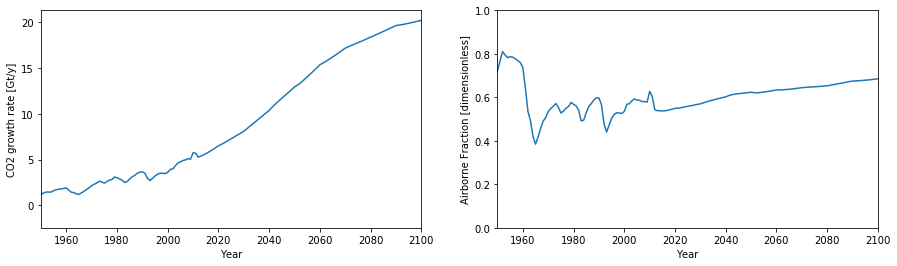

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 4)

ax1.plot(year, atmospheric_growth_rate, label='Growth rate')
ax1.set_xlim([1950, 2100])
ax1.set_ylabel('CO2 growth rate [Gt/y]')
ax1.set_xlabel('Year')

ax2.plot(year, airborne_fraction, label='Airborne Fraction')
ax2.set_xlim([1950, 2100])
ax2.set_ylabel('Airborne Fraction [dimensionless]')
ax2.set_xlabel('Year')
ax2.set_ylim([0, 1.])

<div class="alert alert-info"><h1>Exercise 2: Climate impacts of land use and land cover change: albedo and emissions</h1></div>

By default in `OSCAR` the land surface is divided into five biomes.  These biomes have distinct physical and biogeochemical properties, including:

- an unique albedo
- unique sensitivity to changes in surface temperature, precipitation, and atmospheric carbon dioxide with respect to net primary productivity (the amount of carbon taken up through photosynthesis minus the amount released through respiration)
- unique sensitivity to changes in surface temperature, precipitation, and atmospheric carbon dioxide with respect to biomass burning emissions

The fractions of the planet covered by each of these biomes thus has an impact on the overall solution generated by the model.  If these fractions change (as they are expected to as the population of the world changes and economies evolve) it can thus impact climate.  How big of an impact can it be?

1. Similar to last week run a simulation with the default configuration to serve as a basis of comparison.  Then run a perturbed case, which we'll call LULCC.  This perturbed case will follow the RCP8.5 emissions scenario for land use and land cover change (i.e. configure `OSCAR` to have `scen_LULCC='RCP8.5'`).

In [10]:
default = OSCAR().run(2100)
lulcc = OSCAR(scen_LULCC='RCP8.5').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="2">
<li>Plot the difference in surface temperature between the LULCC case and the control case. Discuss.</li>
</ol>

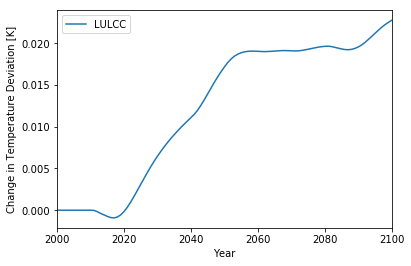

In [11]:
fig, ax = plt.subplots(1, 1)
year = np.arange(len(default['D_gst'])) + 1700

ax.plot(year, lulcc['D_gst'] - default['D_gst'], label='LULCC')

ax.set_ylabel('Change in Temperature Deviation [K]')
ax.set_xlabel('Year')
ax.set_xlim([2000, 2100])
ax.legend()

In [12]:
print lulcc['D_AREA'].keys()

['Europe', 'Bunker fuels', 'China region', 'South & South-East Asia', 'Tropical Africa', 'Former Soviet Union', 'North America', 'South & Central America', 'North Africa & Middle East', 'Total', 'Pacific Developed region']


<ol start="3">
<li>Plot the difference in total area covered by each biome between the LULCC case and the control case. Restrict your x-axis to span years 2000 to 2100. You can use the command `.keys()` we used in previous notebook to check the subdictionaries of the variable 'D_AREA'.</li>
</ol>

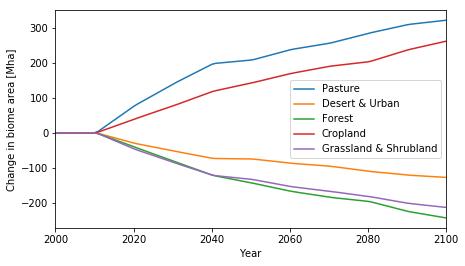

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 4)

for biome, values in lulcc['D_AREA']['Total'].items():
    ax.plot(year, values - default['D_AREA']['Total'][biome], label=biome)
ax.set_xlim([2000, 2100])
ax.set_xlabel('Year')
ax.set_ylabel('Change in biome area [Mha]')
ax.legend()

<ol start="4">
<li> How extreme are the changes in land cover? What percent of the surface area of the Earth do the changes affect (just an order of magnitude estimate is fine)? Note: the radius of the Earth is Re = 6.371e6 m and 1 ha = 1.0e4 square meters. </li>
</ol>

In [16]:
r_e = 6.371e6
sfc_area = 4. * np.pi * r_e ** 2. / (1.0e6 * 1.0e4)  # Convert from square meters to Mha
print sfc_area

51006.447191


In [26]:
# Land cover change in the RCP8.5 scenario amounts to around 1% of the land surface changing biome between 2000 and 2100.
300. / sfc_area

# Note OSCAR does NOT account for natural changes in biome areas due to climate change

0.005881609414526308

<ol start="5">
<li>From your plot above, which biomes are increasing in area in the 21st century and which are decreasing?  Print out the starting albedos of the biomes (`'BIOME_MEAN_ALB'` in the results dictionary produced by running `OSCAR`).  Based on the albedos of the biomes, and how their area changes with time, what kind of albedo changes and impact on climate would you expect (warming or cooling?).</li>
</ol>

In [19]:
print default['BIOME_MEAN_ALB']

{'PAS': 0.23466182539997513, 'GRA+': 0.19304759630127588, 'CRO': 0.19588290878090459, 'FOR': 0.15344729659831213, 'DES+': 0.24872527432662309}


In [20]:
# Changes in cropland and shrubland more or less cancel each other out (they have similar albedo)
# Changes in pasture outweigh changes in deserts (a cooling influence)
# Decreases in forests have a cooling effect (they are the darkest biomes)

<ol start="5">
<li>Plot the difference in radiative forcing as a result of land cover change in the model (`'RF_LCC'`) between the LULCC case and the control simulation.  Does it conform to your expectations from above (just based on looking at the albedo)?</li>
</ol>

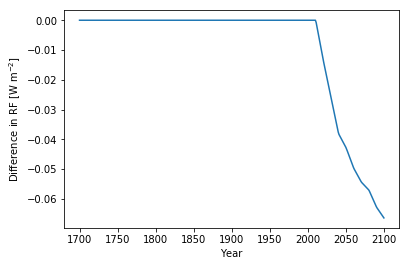

In [21]:
fig, ax = plt.subplots(1, 1)

ax.plot(year, lulcc['RF_LCC'] - default['RF_LCC'])
ax.set_xlabel('Year')
ax.set_ylabel('Difference in RF [W m$^{-2}$]')

<ol start="6">
<li>Return to your result for the surface temperature.  If albedo change has a cooling effect, how does land cover change lead to an increase in temperature? Consider the carbon emissions associated with land use and land cover change ('ELUC'); can these explain the net warming?  Plot the difference in total `ELUC` between the LULCC and control simulations. What biome changes could explain the emission difference between the 2 experiments?</li>
</ol>

(2000, 2100)

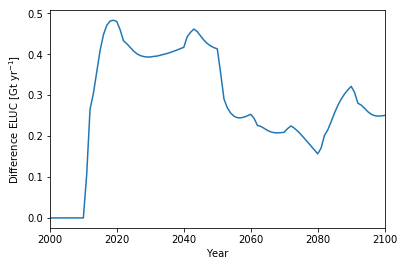

In [22]:
fig, ax = plt.subplots(1, 1)

ax.plot(year, lulcc['ELUC']['Total'] - default['ELUC']['Total'])
ax.set_xlabel('Year')
ax.set_ylabel('Difference ELUC [Gt yr$^{-1}$]')
ax.set_xlim([2000, 2100])

(2000, 2100)

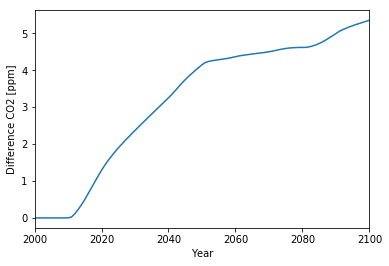

In [23]:
fig, ax = plt.subplots(1, 1)

ax.plot(year, lulcc['D_CO2'] - default['D_CO2'])
ax.set_xlabel('Year')
ax.set_ylabel('Difference CO2 [ppm]')
ax.set_xlim([2000, 2100])

<div class="alert alert-info"><h1>Exercise 3: Ocean "warming up, turning sour and losing breath"</h1></div>

Reference:
Gruber, N., 2011. Warming up, turning sour, losing breath: ocean biogeochemistry under global change. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences 369, 1980–1996. doi:10.1098/rsta.2011.0003

1. Run two simulations -- one with the RCP4.5 scenario for all emissions and one with the RCP8.5 scenario for all emissions until 2100.

In [27]:
r4 = OSCAR(scen_ALL='RCP4.5').run(2100)
r8 = OSCAR(scen_ALL='RCP8.5').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="2">
<li>Plot the evolution of the sea surface temperature (`'D_sst'`), the deep ocean temperature (`'D_gst0'`) and of the Earth global surface temperature (`'D_gst'`) in the 2 simulations. Explain the differences in offset and trend between surface and deep temepratures. </li>
</ol>

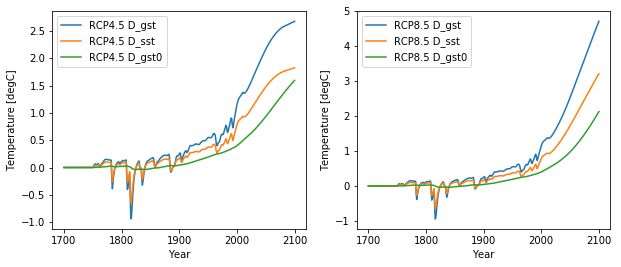

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
variables = ['D_gst', 'D_sst', 'D_gst0']
year = np.arange(len(r4['D_gst'])) + 1700
 
for v in variables:
    ax1.plot(year, r4[v], label='RCP4.5 {}'.format(v))
    
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature [degC]')
ax1.legend(loc='upper left')    

for v in variables:
    ax2.plot(year, r8[v], label='RCP8.5 {}'.format(v))
    
ax2.set_xlabel('Year')
ax2.set_ylabel('Temperature [degC]')
ax2.legend(loc='upper left')

<ol start="3">
<li>Plot the change in ocean mixed layer depth (`'D_mld'`) in the 2 simulations, i.e. the thickness of the surface layer that is well mixed and in contact with the atmosphere and the associated anthropogenic changes (increase in CO2, warming etc.).</li>
<li>Can you explain why the ocean mixed layer depth deepens following volcanic eruptions?</li>
<li>Is the mixing depth deepening or shallowing with warming? Why do you think this happens? In this model, the global mean mixed layer depth at pre-industrial times is 50 m deep. Do you think the simulated change is significant? </li>
</ol>

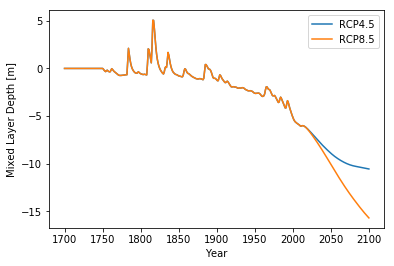

In [30]:
fig, ax = plt.subplots(1, 1)

ax.plot(year, r4['D_mld'], label='RCP4.5')
ax.plot(year, r8['D_mld'], label='RCP8.5')
ax.set_xlabel('Year')
ax.set_ylabel('Mixed Layer Depth [m]')
ax.legend()

<ol start="6">
<li>Plot the evolution of pH (`'D_ph'`) and estimate the acidification by 2100 in the 2 simulations.</li>
<li>What are the impacts of ocean warming, stratification and acidification that you know?</li>
</ol>

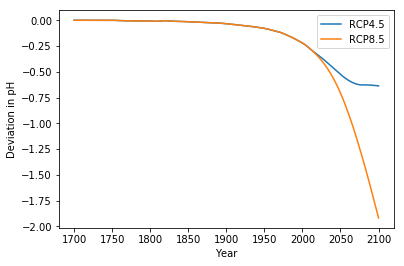

In [32]:
fig, ax = plt.subplots(1, 1)

ax.plot(year, r4['D_pH'], label='RCP4.5')
ax.plot(year, r8['D_pH'], label='RCP8.5')
ax.set_xlabel('Year')
ax.set_ylabel('Deviation in pH')
ax.legend()